<a href="https://colab.research.google.com/github/sugam24/Coding-Neural-Networks-from-scratch/blob/main/4.%20Batch_vs_stochastic_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
#import required libraries
import numpy as np
import pandas as pd
import time

In [88]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akram24/social-network-ads")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'social-network-ads' dataset.
Path to dataset files: /kaggle/input/social-network-ads


In [89]:
df = pd.read_csv(path + "/Social_Network_Ads.csv")

In [90]:
# see first five data
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [91]:
#Extract the required columns only
df = df[['Age', 'EstimatedSalary', 'Purchased']]

In [92]:
#See the modified dataset
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [93]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [94]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [95]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [97]:
X_scaled[:5,:]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

In [98]:
X_scaled.shape

(400, 2)

In [99]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [100]:
#Convert numpy arrays to pytorch tensors
X_scaled_tensor = torch.tensor(X_scaled, dtype = torch.float32)
y_tensor = torch.tensor(y.values if hasattr(y, 'values') else y, dtype=torch.float32).view(-1, 1)
dataset = TensorDataset(X_scaled_tensor, y_tensor)

In [101]:
#Model 1
model = nn.Sequential(
    nn.Linear(2,10),
    nn.ReLU(),
    nn.Linear(10,10),
    nn.ReLU(),
    nn.Linear(10,1),
    nn.Sigmoid()
)

In [102]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): Sigmoid()
)


In [103]:
#Training step
criterion = nn.BCELoss()
#using default optimizer
optimizer = optim.Adam(model.parameters())

In [104]:
print("Training with batch_size = 1")
loader = DataLoader(dataset)
losses = []

Training with batch_size = 1


In [105]:
#stochastic gradient descent
for epoch in range(500):
  total_loss = 0
  for x_batch, y_batch in loader:
    #Forward pass
    output = model(x_batch)
    loss = criterion(output, y_batch)

    #Backward pass
    optimizer.zero_grad() #Clear old accumulating gradients
    loss.backward() #Calculate new gradients
    optimizer.step() #Update weights

    total_loss += loss.item()
  losses.append(total_loss / len(loader))

In [106]:
import matplotlib.pyplot as plt

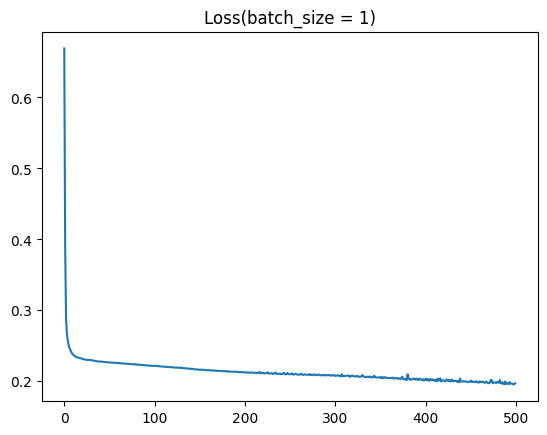

In [107]:
#Plot loss
plt.plot(losses)
plt.title('Loss(batch_size = 1)')
plt.show()

In [108]:
#SECOND MODEL: batch_size=250, epochs=10
#Reset model (same architecture)
model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

In [109]:
optimizer = optim.Adam(model.parameters())

loader = DataLoader(dataset, batch_size=250, shuffle=True)
losses = []

In [110]:
for epoch in range(10):
    total_loss = 0
    for x_batch, y_batch in loader:  # Auto batching!
        output = model(x_batch)
        loss = criterion(output, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    losses.append(total_loss / len(loader))
    print(f"Epoch {epoch+1}, Loss: {losses[-1]:.4f}")

Epoch 1, Loss: 0.6924
Epoch 2, Loss: 0.6922
Epoch 3, Loss: 0.6897
Epoch 4, Loss: 0.6850
Epoch 5, Loss: 0.6857
Epoch 6, Loss: 0.6833
Epoch 7, Loss: 0.6825
Epoch 8, Loss: 0.6795
Epoch 9, Loss: 0.6771
Epoch 10, Loss: 0.6747


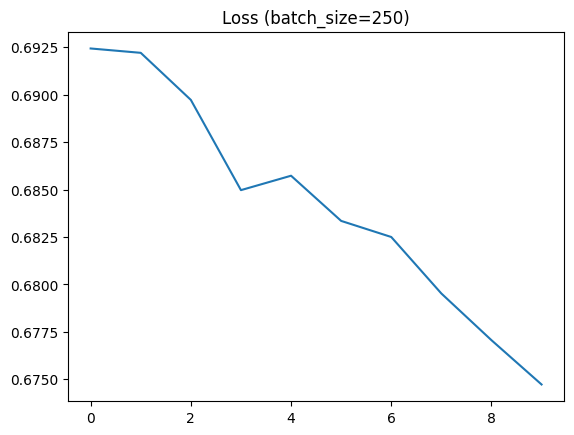

In [111]:
# Plot loss
plt.plot(losses)
plt.title('Loss (batch_size=250)')
plt.show()